In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

/Users/hinalpanchal/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
loan_data = pd.read_csv('Loan Data.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
loan_data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
loan_data.dropna(inplace=True)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB


In [6]:
loan_data.duplicated().sum()

0

In [7]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Create Visualization Understand the Data

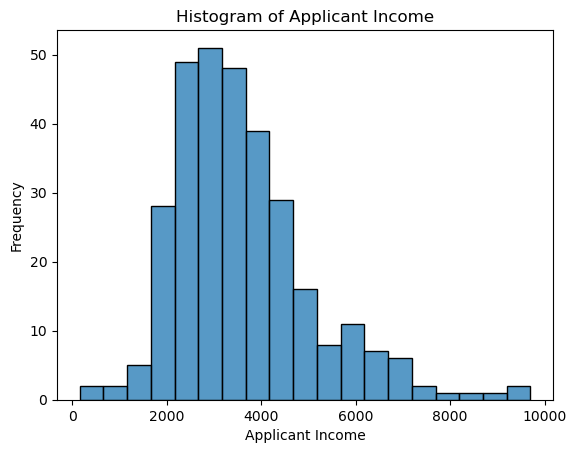

In [8]:
sns.histplot(loan_data['ApplicantIncome'])
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

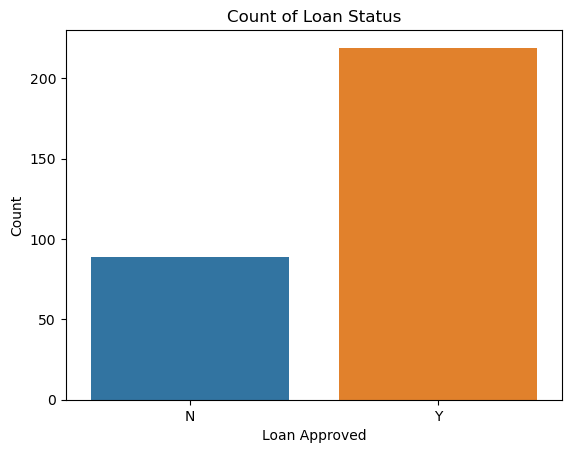

In [9]:
sns.countplot(x='Loan_Status', data = loan_data)
plt.title('Count of Loan Status')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

In [10]:
avg_loan_amount_by_education = loan_data.groupby('Education')['LoanAmount'].mean().reset_index()
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


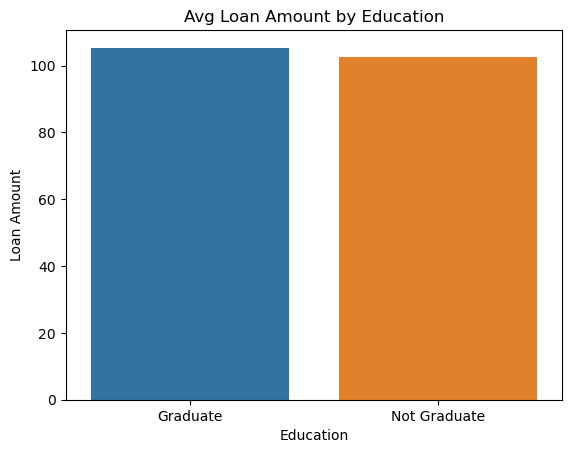

In [11]:
sns.barplot(x='Education', y='LoanAmount', data=avg_loan_amount_by_education)
plt.title('Avg Loan Amount by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

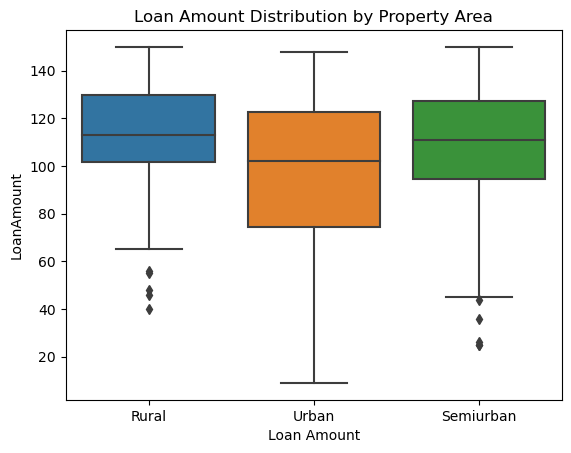

In [12]:
sns.boxplot(x='Property_Area',y='LoanAmount', data= loan_data)
plt.title('Loan Amount Distribution by Property Area')
plt.xlabel('Property Area')
plt.xlabel('Loan Amount')
plt.show()

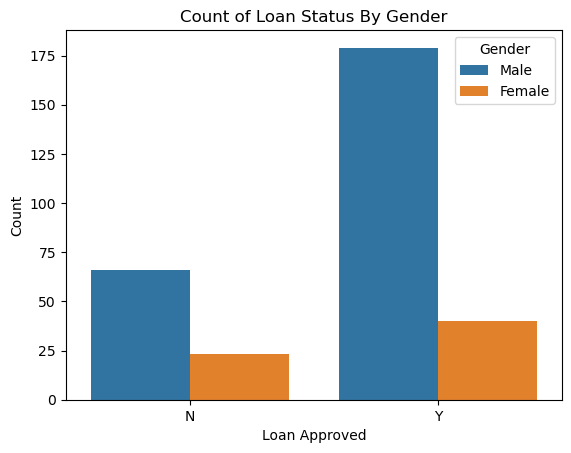

In [13]:
sns.countplot(x='Loan_Status', hue= 'Gender', data = loan_data)
plt.title('Count of Loan Status By Gender')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

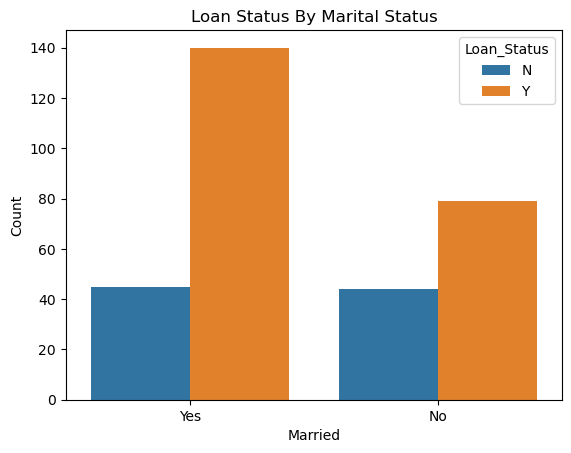

In [14]:
sns.countplot(x='Married', hue= 'Loan_Status', data = loan_data)
plt.title('Loan Status By Marital Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

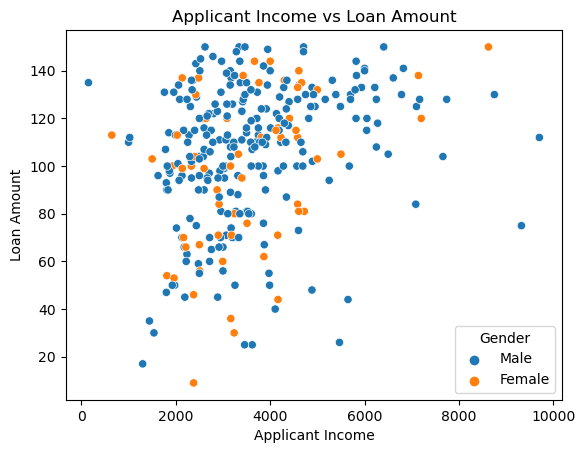

In [15]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue ='Gender', data = loan_data)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [16]:
numeric_data =loan_data.select_dtypes(include=['int64','float64'])

In [17]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [18]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


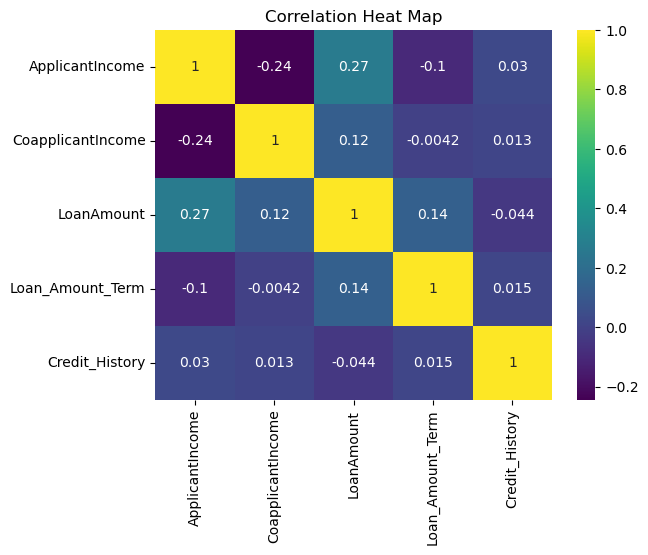

In [19]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heat Map')
plt.show()

In [20]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
Avg_loan_term_by_employeed = loan_data.groupby('Self_Employed')['Loan_Amount_Term'].mean().reset_index()
Avg_loan_term_by_employeed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


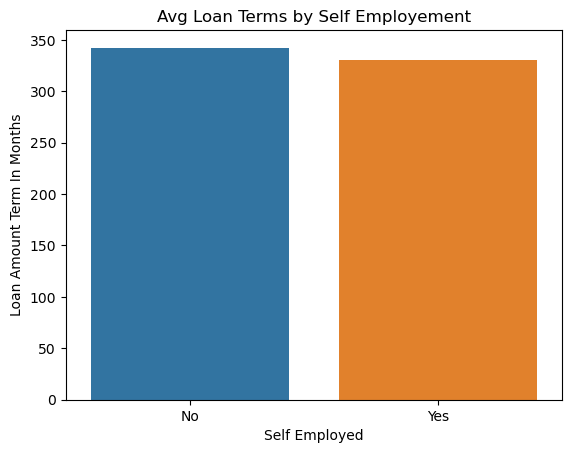

In [22]:
sns.barplot(x='Self_Employed', y= 'Loan_Amount_Term', data= Avg_loan_term_by_employeed)
plt.title('Avg Loan Terms by Self Employement')
plt.xlabel('Self Employed')
plt.ylabel('Loan Amount Term In Months')
plt.show()

# Creating the ML model to make Predictions

In [23]:
#calling the data again for reference and select the needed columns for predictions

loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
X= loan_data[['Married','ApplicantIncome','Education','LoanAmount','Credit_History']].copy()
y= loan_data['Loan_Status']

In [25]:
# since Loan Status is in Y and N we need to convert it, so we do Encoding 

labelencoder = preprocessing.LabelEncoder()
y = labelencoder.fit_transform(y) # n=o, y=1


In [26]:
labelencoder = preprocessing.LabelEncoder()
X['Married'] = labelencoder.fit_transform(X['Married'].astype(str)) # 1= Y, 0=N
X['Education'] = labelencoder.fit_transform(X['Education'].astype(str)) # graduate=0

In [27]:
# Since the Applicant Income and Loan Amount are huge numbers, we want to standarize them
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X = scaler.fit_transform(X)

In [28]:
# for the fast API we need to dump the values

import joblib
joblib.dump(scaler,'Scaler.pkl')

['Scaler.pkl']

# Logistic Regression

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [30]:
# Start with the Logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogisticReg = LogisticRegression()

LogisticReg.fit(X_train, y_train)

prediction= LogisticReg.predict(X_test)


In [31]:
accuracy = accuracy_score(y_test, prediction)

print('Accuracy of the Logistic Regression model is :', accuracy)

Accuracy of the Logistic Regression model is : 0.8709677419354839


# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

param_grid = {'n_neighbors':[3,5,7], 
                'weights':['uniform','distance']}

gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)


In [33]:
gridkn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [34]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [35]:
knpreds =gridkn.predict(X_test)


In [36]:
accuracy = accuracy_score(y_test, knpreds)

print('Accuracy of the KNN model is :', accuracy)

Accuracy of the KNN model is : 0.8387096774193549


# Support Vector Machine

In [37]:
from sklearn.svm import SVC

In [38]:
svm = SVC()
param_grid_svc = {'C':[0.01,0.1,0.5],'kernel':['linear','rbf','poly']}

In [39]:
gridsvm= GridSearchCV(svm,param_grid_svc)

In [40]:
gridsvm.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [41]:
gridsvm.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [42]:
svm_prediction =gridsvm.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, svm_prediction)

print('Accuracy of the KNN model is :', accuracy)

Accuracy of the KNN model is : 0.8924731182795699


In [44]:
joblib.dump(gridsvm, 'model.pkl')

['model.pkl']